In [1]:
#Import code from last time
%run I4-7.ipynb

         Current function value: 0.501753
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104


<Figure size 640x480 with 1 Axes>

         Current function value: 0.531601
         Iterations: 100
         Function evaluations: 104
         Gradient evaluations: 104


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
testX

array([[0.51408451, 0.50704225, 0.75352113, 0.54225352],
       [0.50704225, 0.75352113, 0.54225352, 0.26056338],
       [0.75352113, 0.54225352, 0.26056338, 0.3943662 ],
       [0.54225352, 0.26056338, 0.3943662 , 0.62676056],
       [0.26056338, 0.3943662 , 0.62676056, 0.79577465],
       [0.3943662 , 0.62676056, 0.79577465, 0.70422535],
       [0.62676056, 0.79577465, 0.70422535, 0.53521127],
       [0.79577465, 0.70422535, 0.53521127, 0.40140845],
       [0.70422535, 0.53521127, 0.40140845, 0.12676056],
       [0.53521127, 0.40140845, 0.12676056, 0.33098592],
       [0.40140845, 0.12676056, 0.33098592, 0.41549296],
       [0.12676056, 0.33098592, 0.41549296, 0.55633803],
       [0.33098592, 0.41549296, 0.55633803, 0.5915493 ]])

In [3]:
testY

array([[0.26056338],
       [0.3943662 ],
       [0.62676056],
       [0.79577465],
       [0.70422535],
       [0.53521127],
       [0.40140845],
       [0.12676056],
       [0.33098592],
       [0.41549296],
       [0.55633803],
       [0.5915493 ],
       [0.51408451]])

In [4]:
trainX

array([[0.14788732, 0.06338028, 0.43661972, 0.57042253],
       [0.06338028, 0.43661972, 0.57042253, 0.66901409],
       [0.43661972, 0.57042253, 0.66901409, 0.6971831 ],
       [0.57042253, 0.66901409, 0.6971831 , 0.97183099],
       [0.66901409, 0.6971831 , 0.97183099, 0.5915493 ],
       [0.6971831 , 0.97183099, 0.5915493 , 0.28169014],
       [0.97183099, 0.5915493 , 0.28169014, 0.26056338],
       [0.5915493 , 0.28169014, 0.26056338, 0.46478873],
       [0.28169014, 0.26056338, 0.46478873, 0.99295775],
       [0.26056338, 0.46478873, 0.99295775, 0.67605634],
       [0.46478873, 0.99295775, 0.67605634, 0.25352113],
       [0.99295775, 0.67605634, 0.25352113, 0.45070423],
       [0.67605634, 0.25352113, 0.45070423, 0.        ],
       [0.25352113, 0.45070423, 0.        , 0.48591549],
       [0.45070423, 0.        , 0.48591549, 0.78169014],
       [0.        , 0.48591549, 0.78169014, 0.8028169 ],
       [0.48591549, 0.78169014, 0.8028169 , 0.3028169 ],
       [0.78169014, 0.8028169 ,

In [5]:
trainY

array([[0.66901409],
       [0.6971831 ],
       [0.97183099],
       [0.5915493 ],
       [0.28169014],
       [0.26056338],
       [0.46478873],
       [0.99295775],
       [0.67605634],
       [0.25352113],
       [0.45070423],
       [0.        ],
       [0.48591549],
       [0.78169014],
       [0.8028169 ],
       [0.3028169 ],
       [0.47183099],
       [0.41549296],
       [0.64788732],
       [0.61267606],
       [1.        ],
       [0.47887324],
       [0.3028169 ],
       [0.38028169],
       [0.5915493 ],
       [0.8028169 ],
       [0.47183099],
       [0.26760563],
       [0.4084507 ],
       [0.32394366],
       [0.45774648],
       [0.81690141],
       [0.75352113],
       [0.43661972],
       [0.45774648],
       [0.38732394],
       [0.46478873],
       [0.73239437],
       [0.51408451],
       [0.28169014],
       [0.19014085],
       [0.51408451],
       [0.50704225],
       [0.75352113],
       [0.54225352]])

In [6]:
#Regularization Parameter:
Lambda = 0.0001

In [7]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [8]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0.0001):        
        #Define Hyperparameters
        self.inputLayerSize = 4
        self.outputLayerSize = 1
        self.hiddenLayerSize = 7
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [9]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)
            
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X, y)

        #Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
        perturb[p] = 0
            
    #Return Params to original value:
    N.setParams(paramsInitial)

    return numgrad 

In [10]:
NN = Neural_Network(Lambda=0.0001)

In [11]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [12]:
#Should be less than 1e-8:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

5.868151087229939e-10

In [13]:
T = trainer(NN)

In [14]:
T.train(X,y,testX,testY)

         Current function value: 0.014755
         Iterations: 100
         Function evaluations: 101
         Gradient evaluations: 101


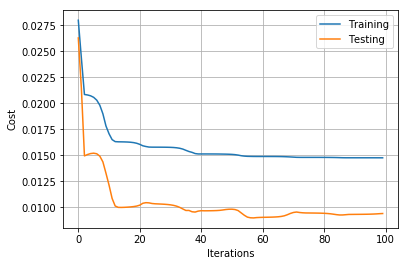

In [15]:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [16]:
T.J

[array([0.02798184]),
 array([0.02435616]),
 array([0.02084447]),
 array([0.02079811]),
 array([0.02071736]),
 array([0.02057006]),
 array([0.02029944]),
 array([0.01981215]),
 array([0.01898733]),
 array([0.0178165]),
 array([0.01706699]),
 array([0.01650394]),
 array([0.01631179]),
 array([0.01629385]),
 array([0.01628994]),
 array([0.0162836]),
 array([0.01627259]),
 array([0.01625278]),
 array([0.01621692]),
 array([0.0161535]),
 array([0.01604901]),
 array([0.01591054]),
 array([0.0158415]),
 array([0.01578822]),
 array([0.01577935]),
 array([0.01577841]),
 array([0.0157777]),
 array([0.01577641]),
 array([0.01577402]),
 array([0.01576955]),
 array([0.01576124]),
 array([0.01574604]),
 array([0.01571893]),
 array([0.01567214]),
 array([0.01559449]),
 array([0.01547423]),
 array([0.01536132]),
 array([0.01527999]),
 array([0.01516384]),
 array([0.01512669]),
 array([0.01512594]),
 array([0.01512577]),
 array([0.01512546]),
 array([0.0151249]),
 array([0.01512384]),
 array([0.015121

In [17]:
T.testJ

[array([0.02627923]),
 array([0.02146124]),
 array([0.01494132]),
 array([0.01507161]),
 array([0.01516356]),
 array([0.01519971]),
 array([0.01514486]),
 array([0.01491671]),
 array([0.01436354]),
 array([0.01327572]),
 array([0.01213067]),
 array([0.0108498]),
 array([0.01012148]),
 array([0.00999069]),
 array([0.00998503]),
 array([0.00999498]),
 array([0.01001208]),
 array([0.01003479]),
 array([0.01006655]),
 array([0.0101157]),
 array([0.01020266]),
 array([0.01038586]),
 array([0.01044183]),
 array([0.01042352]),
 array([0.01036154]),
 array([0.01033505]),
 array([0.01032074]),
 array([0.01030652]),
 array([0.01028956]),
 array([0.01026655]),
 array([0.01023291]),
 array([0.0101819]),
 array([0.01010415]),
 array([0.00998955]),
 array([0.00983738]),
 array([0.0096924]),
 array([0.0096948]),
 array([0.00956868]),
 array([0.00953885]),
 array([0.00963071]),
 array([0.00967157]),
 array([0.00966043]),
 array([0.00966269]),
 array([0.00966648]),
 array([0.00967273]),
 array([0.00968

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.0054801507449719535

In [19]:
yHat=NN.forward(X)

In [20]:
yHat

array([[0.73603343],
       [0.6044984 ],
       [0.49415221],
       [0.50374462],
       [0.34226397],
       [0.29983658],
       [0.43107892],
       [0.6373628 ],
       [0.74587552],
       [0.45871612],
       [0.29509143],
       [0.45085246],
       [0.47047503],
       [0.69022005],
       [0.75957516],
       [0.56782926],
       [0.32254086],
       [0.42442185],
       [0.53375735],
       [0.60306831],
       [0.53017331],
       [0.55921976],
       [0.34041613],
       [0.32132518],
       [0.48732608],
       [0.64046014],
       [0.62583325],
       [0.40960149],
       [0.36511071],
       [0.52809972],
       [0.57879413],
       [0.60805829],
       [0.67460029],
       [0.51951405],
       [0.34638798],
       [0.40156991],
       [0.48875968],
       [0.55490581],
       [0.62388179],
       [0.47559412],
       [0.38884616],
       [0.465121  ],
       [0.67707285],
       [0.64452992],
       [0.60114831],
       [0.44929439],
       [0.36960787],
       [0.506

In [21]:
y

array([[0.66901409],
       [0.6971831 ],
       [0.97183099],
       [0.5915493 ],
       [0.28169014],
       [0.26056338],
       [0.46478873],
       [0.99295775],
       [0.67605634],
       [0.25352113],
       [0.45070423],
       [0.        ],
       [0.48591549],
       [0.78169014],
       [0.8028169 ],
       [0.3028169 ],
       [0.47183099],
       [0.41549296],
       [0.64788732],
       [0.61267606],
       [1.        ],
       [0.47887324],
       [0.3028169 ],
       [0.38028169],
       [0.5915493 ],
       [0.8028169 ],
       [0.47183099],
       [0.26760563],
       [0.4084507 ],
       [0.32394366],
       [0.45774648],
       [0.81690141],
       [0.75352113],
       [0.43661972],
       [0.45774648],
       [0.38732394],
       [0.46478873],
       [0.73239437],
       [0.51408451],
       [0.28169014],
       [0.19014085],
       [0.51408451],
       [0.50704225],
       [0.75352113],
       [0.54225352],
       [0.26056338],
       [0.3943662 ],
       [0.626

In [22]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y,yHat) 

0.02759409763510492

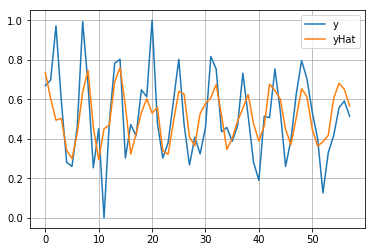

In [23]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [24]:
prediksi=NN.forward(dataprediksi)

In [25]:
prediksi

array([[0.47864032],
       [0.44346184],
       [0.49515242],
       [0.55097238]])

In [26]:
from sklearn.metrics import mean_squared_error 

In [27]:
Y_true= ([	0.387323944	]	,
[	0.373239437	]	,
[	0.366197183	]	,
[	0.443661972	]	,
)


Y_pred=prediksi
mean_squared_error(Y_true,Y_pred) 

0.010353710903699192

In [28]:
dataprediksi

array([[0.41549296, 0.55633803, 0.5915493 , 0.51408451],
       [0.55633803, 0.5915493 , 0.51408451, 0.38732394],
       [0.5915493 , 0.51408451, 0.38732394, 0.37323944],
       [0.51408451, 0.38732394, 0.37323944, 0.36619718]])

In [29]:
a=np.array([	0.387323944	,	0.373239437	,	0.366197183	,	0.443661972	])

In [30]:
#prediksi 1
prediksi=NN.forward(a)
prediksi

array([0.59192863])

In [31]:
#prediksi 2
c=prediksi
b=a[1:]
d=np.concatenate((b,c))
prediksi=NN.forward(d)
prediksi

array([0.61161388])

In [32]:
#prediksi 3
c=prediksi
b=d[1:]
e=np.concatenate((b,c))
prediksi=NN.forward(e)
prediksi

array([0.54724677])

In [33]:
#prediksi 4
c=prediksi
b=e[1:]
f=np.concatenate((b,c))
prediksi=NN.forward(f)
prediksi

array([0.46614602])

In [34]:
#prediksi 5
c=prediksi
b=f[1:]
g=np.concatenate((b,c))
prediksi=NN.forward(g)
prediksi

array([0.44247548])

In [35]:
#prediksi 6
c=prediksi
b=g[1:]
h=np.concatenate((b,c))
prediksi=NN.forward(h)
prediksi

array([0.47699449])